## Project ADA Milestone 2: Exploratory Analysis

**Importing libraries**

For this Milestone, we mainly used Pandas in order to do exploratory analysis. For mathematical operations, and arrays, we used NumPy, and finally for plotting we used Matplotlib and Seaborn.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry as pc
import gettext as gt
import re

**Loading the dataset**

In [32]:
DATA_FOLDER = 'data/'

In [33]:
df = pd.read_csv(DATA_FOLDER + 'en.openfoodfacts.org.products.csv', sep="\t", encoding="utf-8", low_memory=False)

In [34]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1529059204,2018-06-15T10:40:04Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000123,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1535737982,2018-08-31T17:53:02Z,1535737986,2018-08-31T17:53:06Z,Sauce Sweety chili 0%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000178,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1542456332,2018-11-17T12:05:32Z,1542456333,2018-11-17T12:05:33Z,Mini coco,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000291,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1534239669,2018-08-14T09:41:09Z,1534239732,2018-08-14T09:42:12Z,Mendiants,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We see from here that there is a lot of information, and it seems that there is a lot of NaN values for certain columns.

More precisely, we can compute the number of columns in the dataframe:

In [4]:
print('Number of columns in the DataFrame:', df.columns.size)

Number of columns in the DataFrame: 173


There are many features, but we definitely won't work with all of them for the purpose of this project.

As we explore the dataset, we will only keep a few columns from all those we have at our disposal.

**NaN proportion for each column**

As mentioned earlier, it looks like there are many NaN values. Let's see that. Here we compute the proportion of NaN values for each columns, and only plot the columns that have less than 50% of NaNs.

Number of columns that have a proportion of NaN less than 50%:  30


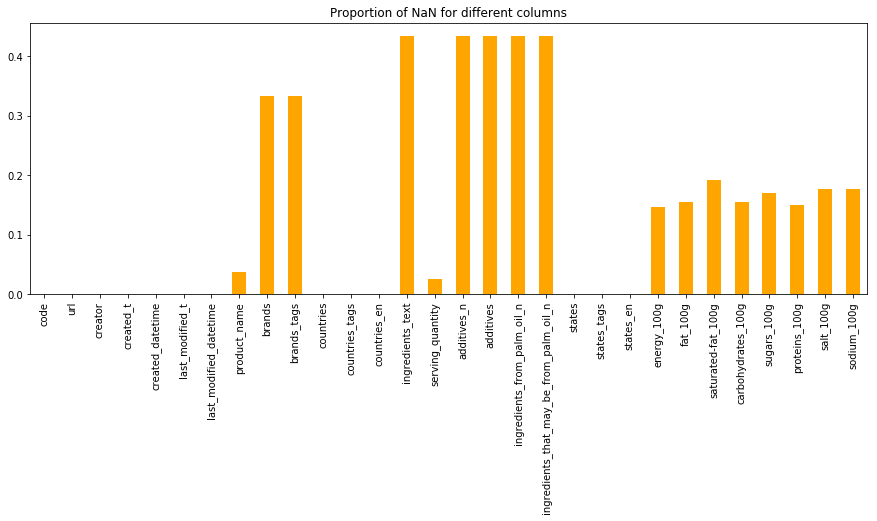

In [5]:
nan_proportion = df.isnull().mean(axis=0)
nan_proportion_50 = nan_proportion[nan_proportion<0.5]
print('Number of columns that have a proportion of NaN less than 50%: ', nan_proportion_50.size)

plt.figure(figsize=(15, 5))
nan_proportion_50.plot(kind='bar', color='orange')
plt.title('Proportion of NaN for different columns')

plt.show()

Quite surprising! Actually, only 30 columns are more than half filled on the 173 that we have at our disposal. This suggest that maybe we will need to review some of things we planned to do because of the missing values. Indeed, if a huge amount of values are missing, we won't get very precise insights about the data for these columns.

**Choosing the columns to keep**

Now let's see with what columns we are going to work with. Of course, we keep the information about the products such as the name, brand, url. 

Then we also want to keep the information about the countries, since it was one of the main focus of the project.

We will also keep all those related to the composition of the products(serving quantity, additives, fat, sugar, ...) as it will help us get insights about which country eats what.

In [6]:
# Columns that we keep for the exploratory analysis
cols = ['product_name', 'url', 'brands_tags', 'countries_en', 'origins', 'serving_quantity', 'additives_n', 
        'fat_100g', 'carbohydrates_100g', 'sugars_100g', 
       'proteins_100g', 'salt_100g', 'labels', 'packaging']

# Filter to only keep the columns we need
df = df[cols]

**Cleaning the countries columns**

The columns 'origins' and 'countries_en' need a lot of cleaning to be usable later.

In [7]:
# Put everything in lowercase in order to have more consistency
df['countries_en'] = df['countries_en'].str.lower() 
df['origins'] = df['origins'].str.lower()

For outlier exploration, we defined a function to check wether the columns with countries are in the right format or not.

In [8]:
def countries_format_check(df, column):
    '''Counts the number of occurences of some unexpected types or values for entries in the specified column'''
    
    counter_wrong_type = 0
    counter_empty_string = 0
    counter_nan = 0

    for entry in df[column]:
        if not(type(entry) is str):
            counter_wrong_type += 1
        elif entry == "":
            counter_empty_string += 1
            
        if entry != entry: # entry is NaN <=> entry != entry
            counter_nan += 1

    print("%d values in " %counter_wrong_type + column + " are not of type 'str'")
    print("%d values in " %counter_nan + column + " are nan")
    print("%d values in " %counter_empty_string + column + " are empty strings")

In [9]:
countries_format_check(df, 'countries_en')

597 values in countries_en are not of type 'str'
597 values in countries_en are nan
0 values in countries_en are empty strings


As we can see, some entries in the column 'countries_en' are actually not strings. Actually, these outliers are always NaN (so they have float type). Since this value is needed we can drop these samples.

In [10]:
countries_format_check(df, 'origins')

653706 values in origins are not of type 'str'
653706 values in origins are nan
0 values in origins are empty strings


In the 'origins' column, it is even worse. We rarely even have anything else than a NaN. When we are interested in the origins of a product, we need to drop these outliers. Otherwise we need to keep them (or we would lose too much data).

In [11]:
def explode_dataframe(df, column, separator):
    ''' Duplicates the rows of the input DataFrame df, by splitting on 'separator' the string contained in 'column'
        For example, when using this function on column C, with separator ',' on the following DataFrame
            A  B  C
        1   1  2  a,b
        2   3  4  c,d,e
    
        We expect a return value like this:
            A  B  C
        1   1  2  a
        1   1  2  b
        2   3  4  c
        2   3  4  d
        2   3  4  e
    '''
    
    # Helper function that duplicates a single 'row' and appends the result to 'rows'
    def explode_row(row, rows):
        splitted_string = row[column].split(separator)
        for s in splitted_string:
            new_row = row.to_dict()
            new_row[column] = s
            rows.append(new_row)
    
    rows = []
    df.apply(lambda row : explode_row(row, rows), axis=1)

    new_df = pd.DataFrame(rows)
    return new_df

First, we split the 'countries' and 'origins' columns, since they may contain more than one country.

In [12]:
df = explode_dataframe(df.dropna(subset=['countries_en']), 'countries_en', ',')
print('New shape of our DataFrame:', df.shape)

New shape of our DataFrame: (727877, 14)


As we can see, we end up with quite a lot more data when splitting to get all the countries separated.

In [13]:
df_with_origins = explode_dataframe(df.dropna(subset=['origins']), 'origins', ',')
print('Shape of the DataFrame with the origins:', df_with_origins.shape)

Shape of the DataFrame with the origins: (62187, 14)


But due to the number of NaN values in 'origins', we have a lot less data in df_with origins. Now we'll either use df_with_origins when we need the origins, or df when we don't need the origins. Thus we can drop the column 'origins' in df.

In [14]:
df = df.drop(['origins'], axis=1)

Now the main issue is that the format of these strings is not consistent at all. Some country names are written in french, some are in english, etc... Also some are very specific (country + region + county for example), and we will not be interested in so much spatial detail. We also still have outliers from which we cannot retrieve the country it corresponds to (like strings that do not even contain the country's name).

First we load the main used languages that we will translate from.

In [15]:
languages = [gt.translation('iso3166', pc.LOCALES_DIR, languages=['fr']),
    gt.translation('iso3166', pc.LOCALES_DIR, languages=['de']),
    gt.translation('iso3166', pc.LOCALES_DIR, languages=['spanish']),
    gt.translation('iso3166', pc.LOCALES_DIR, languages=['italian'])]

Now we need to be able to read the countries lists from pycountry. We defined 4 functions for that.

In [16]:
# Read the country names in english
def read_country_names_en():
    country_names = []
    for country in pc.countries:
        country_names.append(country.name.lower())
    return country_names

# Read the country names translated in another language
def read_country_names_translated(language):
    country_names = []
    for country in pc.countries:
        country_names.append(language.gettext(country.name).lower())
    return country_names

# Read the country alpha2 codes
def read_country_alpha2s():
    country_names = []
    for country in pc.countries:
        country_names.append(country.alpha_2.lower())
    return country_names

# Read the country alpha3 codes
def read_country_alpha3s():
    country_names = []
    for country in pc.countries:
        country_names.append(country.alpha_3.lower())
    return country_names

Now we can apply that to get a dictionary to translate the different country names or codes into the english country names.

In [17]:
country_names_dicts = []
countries_en = read_country_names_en() # Values to which the names will map (english version of the country names)

# Transform a list of country names to a dictionary mapping each of them to the english version, and add them to the dictionary list
def append_dict(countries_list):
    country_names_dicts.append(dict(zip(countries_list, countries_en)))

append_dict(countries_en)
for language in languages:
    append_dict(read_country_names_translated(language))
append_dict(read_country_alpha2s())
append_dict(read_country_alpha3s())

# Concats all the dictionaries to one single dictionary
countries_dictionary = {}
for i in range(0, len(country_names_dicts)):
    countries_dictionary = {**countries_dictionary, **country_names_dicts[i]}

We can now easily define an efficient function that translates a country to the english name.

In [18]:
# Translate the parameter 'country' to its english name.
def translate_country(country):
    return countries_dictionary.get(country, np.NaN)

For example, when used on 'allemagne', and on 'zzzzzz' (something we can't translate) we get:

In [19]:
print(translate_country('allemagne'))
print(translate_country('zzzzzz'))

germany
nan


In [20]:
# Translate the 'countries_en' column in df
df['countries_en'] = df['countries_en'].map(lambda country : translate_country(country))

# Translate the 'countries_en' and the 'origins' columns in df_with_origins
df_with_origins['countries_en'] = df_with_origins['countries_en'].map(lambda country : translate_country(country))
df_with_origins['origins'] = df_with_origins['origins'].map(lambda country : translate_country(country))

# Get rid of the new NaN values induced by impossibility to translate
df = df.dropna(subset=['countries_en'])
df_with_origins = df_with_origins.dropna(subset=['countries_en', 'origins'])

In [21]:
print('New shape of our DataFrame:', df.shape)
print('Shape of the DataFrame with the origins:', df_with_origins.shape)

New shape of our DataFrame: (725334, 13)
Shape of the DataFrame with the origins: (36555, 14)


As we can see, a few rows were lost in df (about 2k), but many were lost in df_with_origins (almost half of them) because the format of 'origins' is very inconsistent and is written in more varied languages.

**Import - Export**

As a first analysis, we will try to visualize which countries import and export, for the main countries in the dataset.

Now let's get the destination and origin countries for the products, and try to first visualize which are the top destination countries:

In [22]:
dest_count = df['countries_en'].value_counts()

We plot below the top-25 destination countries. Note that since France has a significantly higher number of products (this is a french dataset), we also plot in the log scale.

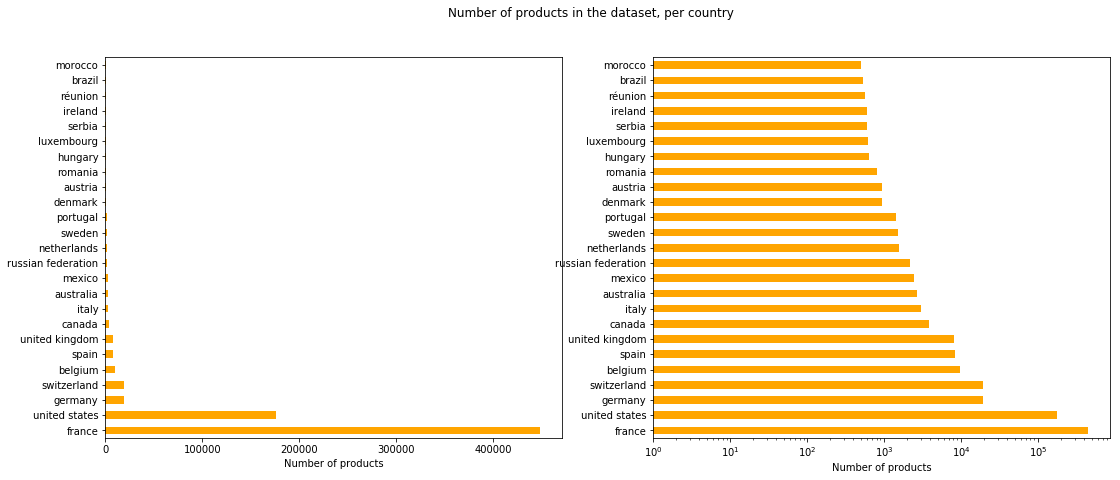

In [23]:
#Create subplots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

#Plot the count of the products for each destination country
dest_count[:25].plot(kind='barh', color='orange', ax=ax1)
ax1.set_xlabel('Number of products')

#Plot again in log scale
dest_count[:25].plot(kind='barh', color='orange', ax=ax2, log=True)
ax2.set_xlabel('Number of products')

f.suptitle('Number of products in the dataset, per country')
plt.show()

Not surprinsingly, the top countries are mainly those from Europe (again, the dataset focuses a lot on France and Europe), but we can also see the US and Mexico for example.

Here, we will visualize the origins and destinations, for the top 15 countries in the destinations. We chose to represent this information as a heatmap. 
For each pair of countries, we compute the number of food products for that pair and add one to the corresponding cell in a matrix representing those pairs.

After the matrix is filled with the counts of the different pairs, we use the heatmap() function of Seaborn to visualize the results.

In [24]:
top_15 = df_with_origins['countries_en'].value_counts()[:15].index

In [25]:
def compute_heatmap(df, countries):
    """Given a dataframe, compute a 
    heatmap matrix for import-export
    analysis"""
    
    # Create the matrix that will contain the counts
    matrix = pd.DataFrame(np.zeros((countries.size, countries.size)), index=countries, columns=countries)

    # Fill in the matrix (for the top countries)
    for idx, row in df.iterrows():
        origin = row['origins']
        destination = row['countries_en']
        if destination in countries and origin in countries:
            matrix.at[origin, destination] += 1
    return matrix

In [26]:
def plot_heatmap(matrix):
    """Plot the given matrix as a heatmap"""
    
    # Create subplots
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

    # Use Seaborn to plot a heatmap using the matrix
    sns.heatmap(matrix, linewidth=0.5, cmap='Reds', ax=ax1)
    ax1.set_ylabel('Origin Country')
    ax1.set_xlabel('Destination Country')

    # Plot again in log scale
    sns.heatmap(np.log(matrix+1), linewidth=0.5, cmap='Reds', ax=ax2)
    ax2.set_ylabel('Origin Country')
    ax2.set_xlabel('Destination Country')

    f.suptitle('Import-Export count between countries')
    plt.show()

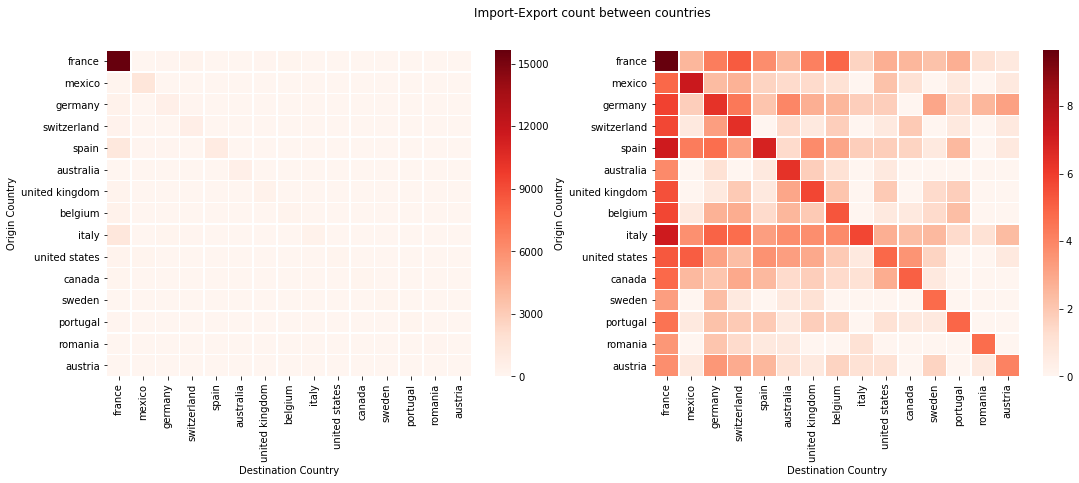

In [27]:
plot_heatmap(compute_heatmap(df_with_origins, top_15))

As France has a count that is a lot larger, we also plotted on the right with a log scale to get better insights. What we see from this plot is very interesting. 

With this dataset, it looks like many countries actually produce their own food. Again, as France has always more data in this dataset, we see that France import and export to many countries. This may definitely be biased, and that's why we prefer to focus also on the other countries.

Australia and UK also produce a lot of their own food. As big exporters, we spot Spain, Germany, Italy and Portugal, which makes sens for Europe. As importers, the plot suggests that Germany, Switzerland, Australia and UK are the main ones.

**Which countries sell what? (in terms of composition)**

In this part, we focus on an interesting analysis that aim to see which are the top countries that eat with the biggest number of additives, the most quantity of sugar, salt, fat or proteins.

This may be a good indicator of the quality of the products sold in our top countries. Are they healthy or not?

In order to compute that, we will make use of the columns below, reunited in a list called `composition_cols`. Here again, we will need to use the countries where the products are sold.

In [28]:
# Get the columns we need to do the analysis
composition_cols = ['additives_n', 'fat_100g', 'carbohydrates_100g', 'sugars_100g', 
                    'proteins_100g', 'salt_100g']

In [29]:
# We group by country, and compute the mean for the columns we need
composition_mean = df.groupby('countries_en')[composition_cols].mean()

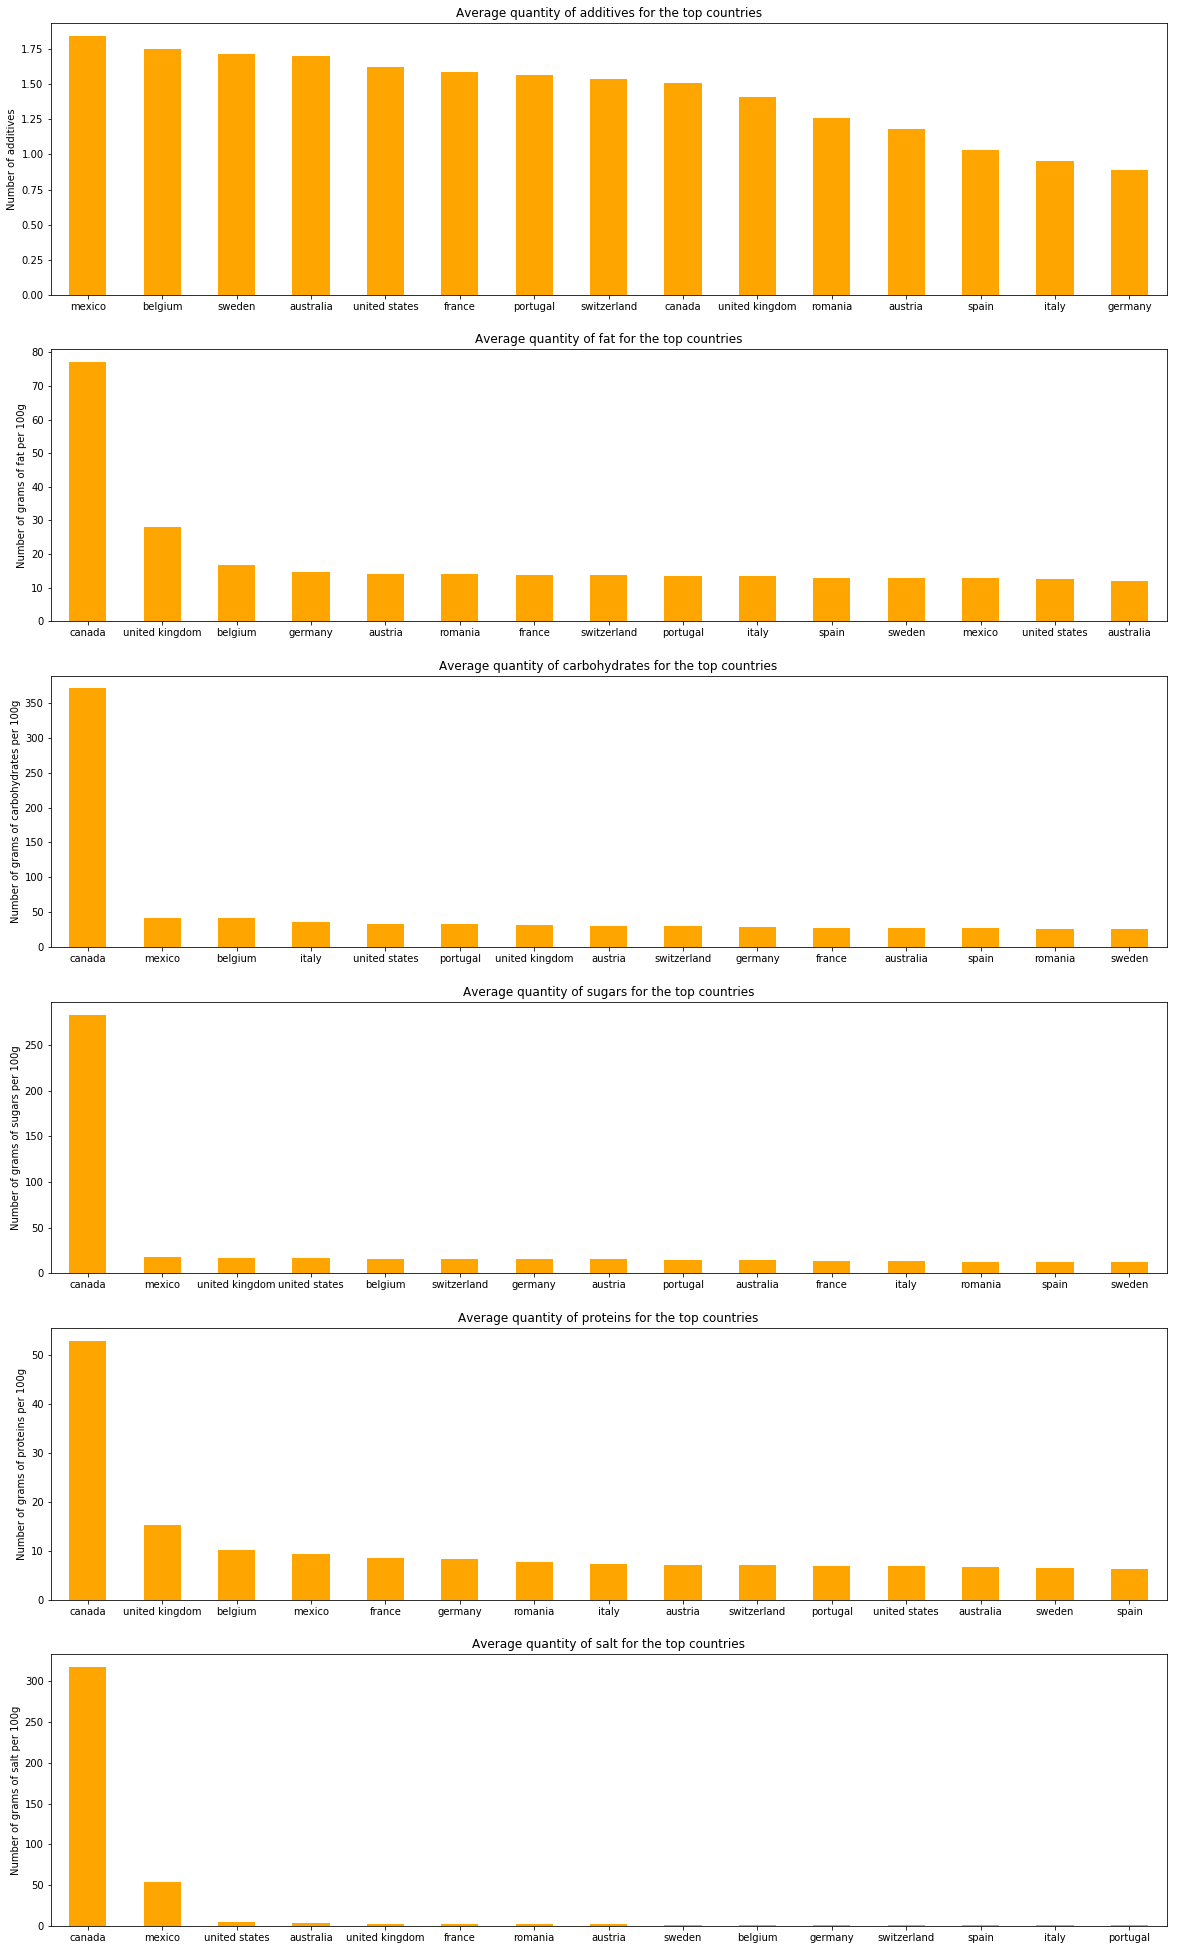

In [30]:
# Create subplot for the visualization
f, axarr = plt.subplots(len(composition_cols), 1, figsize=(20, 35))

# For each composition property (sugar, fat, ...)
for i, comp in enumerate(composition_cols):
    # Plot a bar chart for our top 15 countries
    composition_mean[comp].loc[top_15].sort_values(ascending=False).plot(kind='bar', 
                                                                         color='orange', rot=0, ax=axarr[i])
    
    # Get the name of the column without the "_100g" or "_n"
    comp_name = comp.split('_', 1)[0]
    
    # Set the axis titles depending on the columns
    if comp == 'additives_n':
        axarr[i].set_ylabel('Number of additives')
    else:
        axarr[i].set_ylabel('Number of grams of ' + comp_name + ' per 100g')
        
    # Set the title of the plots
    axarr[i].set_title('Average quantity of ' + comp_name + ' for the top countries')

plt.show()

It is hard to get any conclusions at this point, but we can see for example in terms of sugar, proteins, fat and carbohydrates, Canada has quantites that are a lot larger compared to the other countries.

For the salt, interestingly, the countries with the biggest quantities are those from America. It is also the case for the sugar, fat and carbohydrates, where we see them in the first countries. Does this imply that countries from America have products that are less healthy?

Again, this is hard to conclude this, but the bar charts show interesting results. We believe that it will be easier to get more insights when we will have the visualization on the world map.

**Packaging and BIO label**

In this part, we'll try to see what type of packages is the most used throughout the world. We will then have a look at the most used packages in each of our top 15 countries.

First, we compute, in percentage, the most used packages and plot the top 10.

In [31]:
df_with_packages = explode_dataframe(df.dropna(subset=['packaging']), 'packaging', ',')

In [32]:
def plot_most_used_packaging(df):
    most_used_packaging = df.groupby('packaging').size().sort_values(ascending=False)
    most_used_packaging /= most_used_packaging.sum()

    most_used_packaging[:10].plot(kind='barh', color='orange')

    plt.xlabel('Proportion (in %)')
    plt.show()

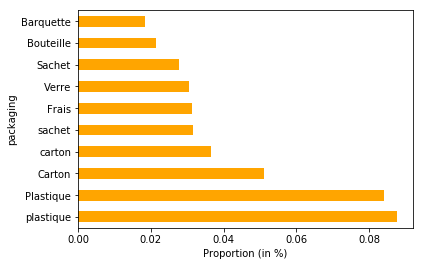

In [33]:
plot_most_used_packaging(df_with_packages)

The name of the types of packages are in French, but what we see is that we mostly use plastic. In second place we have the paperbox, and after we see glass and bottles. 

(Again here, we ask the reader to keep in mind that this is a French dataset, and so it may not reflect the actual worldwide trends.)

Let's see now, for each of our top countries, the two types of packages they use the most:

In [34]:
def display_top2_packages(df):
    """Display the 2 most used packages
    for the top 15 countries"""
    
    # First group by country and packaging, then get frequency of packaging and sort these
    most_used_packaging_per_country = df.groupby(['countries_en', 'packaging']) \
                                        .size() \
                                        .sort_values() \
                                        .groupby(level=0) \
                                        .tail(2)
    
    # Return a dataframe with the country names sorted
    return pd.DataFrame(most_used_packaging_per_country.loc[top_15]) \
                    .drop(columns=0, axis=1) \
                    .sort_values('countries_en')

In [35]:
display_top2_packages(df_with_packages)

Empty DataFrame
Columns: []
Index: [(australia, Canned), (australia, Plastic), (austria, Glas), (austria, Stück), (belgium, plastique), (belgium, Plastique), (canada, carton), (canada, plastique), (france, plastique), (france, Plastique), (germany, Kunststoff), (germany, Glas), (italy, plastica), (italy, Plastica), (mexico, PLASTICO), (mexico, Plástico), (portugal, Plástico), (portugal, Cartão), (romania, Folie alimentara), (romania, PET), (spain, Plástico), (spain, Bolsa de plástico), (sweden, Carton), (sweden, Plastic), (switzerland, plastique), (switzerland, Plastique), (united kingdom, Plastic), (united kingdom, plastique), (united states, Plastic), (united states, plastique)]

In [36]:
def bio_label(df):
    return df[
    df['labels'].str.contains("Bio", na=False, flags=re.IGNORECASE)
  | df['labels'].str.contains("Organic", na=False, flags=re.IGNORECASE)
  |  df['labels'].str.contains("\bAB\b", na=False, flags=re.IGNORECASE)
    ]

In [37]:
# Select products with an organic label
df_bio_label = bio_label(df_with_packages)

We plot again to get the proportion of the top 10 types of packaging:

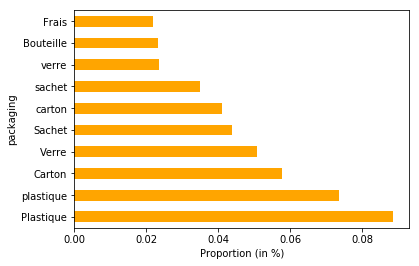

In [38]:
plot_most_used_packaging(df_bio_label)

Not quite what we would have like to find out! It seems like plastic is still the most used. But let's check the 2 most used packages for BIO products for our top 15.

In [39]:
display_top2_packages(df_bio_label)

Empty DataFrame
Columns: []
Index: [(australia, Plastic Bottle), (australia, Plastic), (austria, Kunststoff), (austria, Karton), (belgium, plastique), (belgium, Carton), (canada, Carton), (canada, plastique), (france, plastique), (france, Plastique), (germany, Glas), (germany, Kunststoff), (italy, Carta), (italy, Plastica), (mexico, PLASTICO), (mexico, BOLSA), (portugal, plastique), (portugal, Plástico), (romania, Pahar plastic), (romania, Tetra Pak), (spain, Refrigerado), (spain, Bolsa de plástico), (sweden, Plastic), (sweden, Carton), (switzerland, Plastique), (switzerland, plastique), (united kingdom, plastic), (united kingdom, Plastic), (united states, plastique), (united states, Plastic)]

Quite different! Indeed, there is actually still a lot of plastic, but we can see packaging like tetrapack or paperbox, which are a lot better for the environment.

**Are the BIO produts local?**

Finally, we use the heatmap function of the import export to see for our top 15 countries wether for the BIO products, they are actually local.

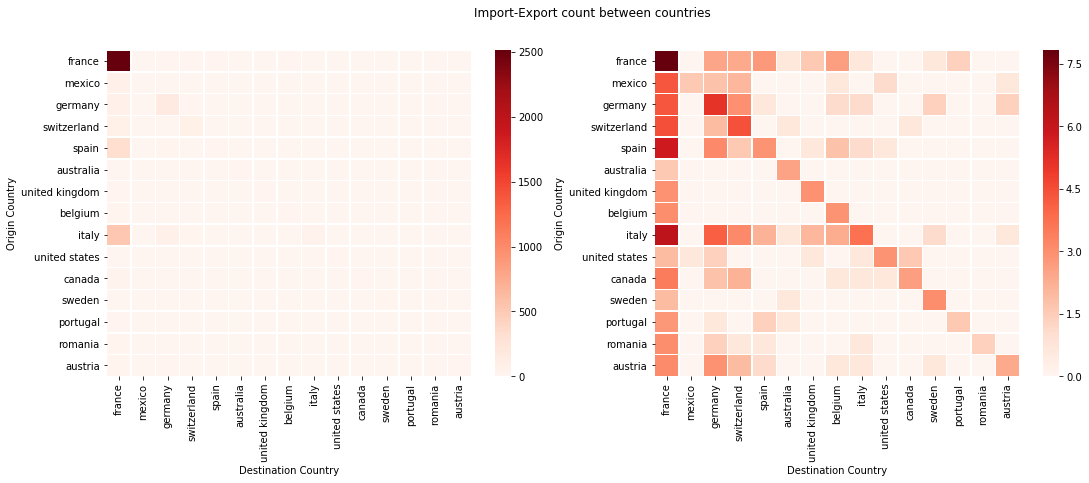

In [40]:
plot_heatmap(compute_heatmap(bio_label(df_with_origins), top_15))

Again, if we don't look at France here, we can see that most country eat BIO product that come from within the country (look at the diagonal on the heatmap). But we also see that not all of them eat local. For example, Mexico, Italy, or the US don't seem to do it.

We see that Italy export a lot of its BIO products to countries in Europe, as well as Canada or Portugal.

**Plans for Milestone 3**

For the 3rd milestone, we mainly plan to:

- Add visualization part (world map, with the information we got from this milestone) &rarr; For the 2nd of December

- Perform the machine learning part with the images for the BIO products (to see if there are recurrent patterns or dominant colors) &rarr; For the 7th of December

***Note that we already created a script in order to download the images of products with the BIO label. It can be found in the notebook `Labels_filtering_and_images_downloading.ipynb`.***

- Choose between data story or report and complete it &rarr; For the 14th of December

- Complete the missing parts and prepare for the final submission &rarr; For the 16th of December


**Plans for the presentation**

For the presentation, we plan to:

- Give an introduction about the problem of how the food travels, more about packaging

- Explain what our project was about (where the food comes from, biological products & packaging)

- Show and explain the different insights we got together with the maps of the world

- Show the machine learning part and indicate the patterns and dominant colors we found for the biological products